# DSCI 100 Group 10: Project Report

## Group Members:
- Mohammed Samiul ISLAM SAMI, 58031451
- Narjis Alhusseini, 66272287
- Yangyi Zhu, 67642025
- Norman Wu, 24434375


# Classification of Diabetic Patients using the Concentration of Glucose, Insulin, Blood Pressure, and BMI Measurements as Predictors.


## Introduction

Diabetes Mellitus is a medical condition that impacts the way the body processes glucose, the main form of sugar which provides energy to the body. It is influenced by factors such as obesity and unhealthy diets characterized by excessive sugar intake and involves reduced insulin levels which hinder glucose absorption into cells and lead to elevated blood glucose levels, marking the onset of diabetes (CDC, 2023).
 
Our analysis, utilizing a Kaggle-derived dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, aims to determine whether a diabetic diagnosis can be determined from multiple clinical measurements. The dataset focuses on female patients aged 21 or older from the Pima Indian heritage. The following columns are included:
 
- Pregnancies (the number of pregnancies the patient had)
    - **pregnancies**
- Glucose (Plasma glucose concentration, a 2 hour oral glucose tolerance test. $mg/dL$)
    - **glucose**
- Blood Pressure (Diastolic blood pressure in $mm\,Hg$)
    - **blood_pressure**
- Skin Thickness (Triceps skin fold thickness in $mm$)
    - **skin_thickness**
- Insulin (2 Hour serum insulin in $\mu U/mL$)
    - **insulin**
- BMI (Body Mass Index in $kg/m^2$)
    - **bmi**
- Diabetes pedigree function (uncommon genetic measure of the likelihood that a patient will have diabetes based on genetics)
    - **dpf**
- Age (years)
    - **age**
- Outcome (a value indicating whether or not the patient is diabetic)
    - **outcome**
 
The analysis will work towards answering the classification question: can glucose concentration, insulin levels, blood pressure, and BMI measurements determine whether an individual has diabetes? This inquiry also investigates whether the classified dataset can be leveraged to diagnose whether a new, unclassified set of patient observations can be classified into the diabetic or non-diabetic class.
 
The four predictor variables named were chosen based on their clinical significance in diabetes diagnosis. The Mayo Clinic discusses the relationship between diabetes, insulin, and hyperglycemia: the condition which defines high levels of blood glucose (Mayo Clinic Staff, 2022). Insulin, a hormone produced by the pancreas, regulates glucose levels in the bloodstream by facilitating its absorption and storage in tissue (Mayo Clinic Staff, 2022).
 
Research reveals that glucose levels of 100-125 mg/dL are pre-diabetic while levels of 126 mg/dL or higher indicate diabetes (Mayo Clinic Staff, 2022). In order to achieve such high hyperglycemic levels, there must be a lack of insulin production in the body therefore high glucose with low insulin values are hypothesized to classify patients as diabetic in our model.
 
Additionally, Hopkins Medicine states that high blood pressure is twice as common in individuals with diabetes (Hopkins Medicine, 2023). Our dataset includes diastolic blood pressure measurements, and we hypothesize a strong correlation between diabetic classification and pressures of 90 mm Hg or higher as per the characterization of high diastolic blood pressure used in standard patient analysis (Hopkins Medicine, 2023).
 
Finally, excessive sugar intake is correlated with unhealthy dietary habits leading to obesity. Klein et al. explain that obesity leads to the impaired function of the cells which secrete insulin into the bloodstream during digestion (2022). BMI is a health measure used to determine obesity as a function of height and weight. Since our dataset is entirely female, we hypothesize that a BMI of 30 or above will be correlated to a diabetic classification as defined by the women’s BMI classification scale (Diabetes Canada, 2023).
 
Due to this research-based correlation between predictor variables, we can ultimately hypothesize that hyperglycemia leading to obesity will lower the insulin levels and cause diabetes, therefore resulting in high blood pressure. 
 
In order to decide whether these predictor variables will show these results within our dataset, an exploratory data analysis will be performed to collect the correlational metrics between each predictor and the outcome. 


## Methods and Results

## Loading the Data from the Web and Installing/Loading Packages and Libraries

In [1]:
install.packages("kknn")      #This package is for creating the algorithm.
install.packages("GGally")    #This is for exploratory analysis
install.packages("cowplot")   #This is just for plot_grid to make our data more organised
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(repr)                 #To rescale our graphs
library(dplyr)
library(GGally)
library(cowplot)
library(kknn)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ──────────────────────

In [1]:
download.file("https://raw.githubusercontent.com/narjisaa/dsci-100-2023w1-group-10/main/data/diabetes.csv", "data/diabetes.csv")
diabetes_data <- read_csv("data/diabetes.csv")

ERROR: Error in read_csv("data/diabetes.csv"): could not find function "read_csv"


After downloading the data, we decided to fit the column names to the tidy convention we have been seeing in DSCI100; all lowercase letters and underscores for spaces. the `outcome` column is a `dbl` right now and that does not have too much sense. So we have decided to change that into `chr` in order to change the data into a factor with more meaning data values rather than just 1's and 0's.

In [2]:
colnames(diabetes_data) <- c("pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "dpf", "age", "outcome")

# Casted outcame into chr to change names
class(diabetes_data$outcome) = "chr"
head(diabetes_data)

ERROR: Error in colnames(diabetes_data) <- c("pregnancies", "glucose", "blood_pressure", : object 'diabetes_data' not found


**(Table 1.1, data with changed headings and data type)**

We now will change all 0's into NA where it doesn't make sense. All the columns aside from pregnancies and outcome use 0 instead of NA for missing data,this will be changed so that `na.omit` can be used later.

In [3]:
# Replace all 0 with NA
diabetes_data$glucose[diabetes_data$glucose == 0] <- NA
diabetes_data$skin_thickness[diabetes_data$skin_thickness == 0] <- NA
diabetes_data$insulin[diabetes_data$insulin == 0] <- NA
diabetes_data$bmi[diabetes_data$bmi == 0] <- NA
diabetes_data$dpf[diabetes_data$dpf == 0] <- NA
diabetes_data$age[diabetes_data$age == 0] <- NA


ERROR: Error in diabetes_data$glucose[diabetes_data$glucose == 0] <- NA: object 'diabetes_data' not found


Now, the outcome column will be adjusted to contain "non-diabetic" and "diabetic" instead of 0's and 1's. It will also be changed to be of the factor type. The data set will select our predictors and response `glucose`, `insulin`, `bmi`, `blood_pressure` and `outcome` and finally, remove all the NA values from the data frame. We will now save this data frame into `DIABETES_DATA` and this will represent the base data frame we will be using throughout this analysis.

In [4]:
# Change all 0 to non-diabetic and all 1 to diabetic
diabetes_data$outcome[diabetes_data$outcome == 0] <- "non-diabetic"
diabetes_data$outcome[diabetes_data$outcome == 1] <- "diabetic"

# Casting outcome into factor, selecting relevant data and then removing all NA values.
DIABETES_DATA <- diabetes_data |>
                 mutate(outcome = as.factor(outcome)) |>
                 select(glucose, insulin, bmi, blood_pressure, outcome) |>
                 na.omit()

head(DIABETES_DATA) #~~~THIS IS THE MAIN DATASET TO BE USED, DO NOT REASSIGN.

ERROR: Error in diabetes_data$outcome[diabetes_data$outcome == 0] <- "non-diabetic": object 'diabetes_data' not found


**(Table 1.2, data with better named `outcome` column and selected columns)**

## Exploratory Summaries and Figures

In [6]:
diabetes_mean0 <- DIABETES_DATA |>
                 filter(outcome == "non-diabetic") |>
                 map_df(mean, na.rm = TRUE) |>
                 mutate(outcome = "non-diabetic")
diabetes_mean1 <- DIABETES_DATA |>
                 filter(outcome == "diabetic") |>
                 map_df(mean, na.rm = TRUE) |>
                 mutate(outcome = "diabetic")
diabetes_means <- diabetes_mean0 |>
                  add_row(diabetes_mean1)
diabetes_means

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


glucose,insulin,bmi,blood_pressure,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
111.4313,130.8550,31.75076,68.96947,non-diabetic
145.1923,206.8462,35.77769,74.07692,diabetic


**(Table 1.3, data with the means of each column separated into the different patient types)**

Separating the data into non-diabetic and diabetic and then finding the means, we can figure out variables that might be good predictors early on. We can see that glucose and insulin have a large difference between the non-diabetic and diabetic classes.

In [5]:
options(repr.plot.height = 6, repr.plot.width = 10)
outcome_bar <- ggplot(DIABETES_DATA, aes(outcome, fill = outcome)) +
        geom_bar() +
        labs(title = "Frequency of the outcome column", y = "Frequency", x = "Type of Patient")
        
outcome_bar

ERROR: Error in ggplot(DIABETES_DATA, aes(outcome, fill = outcome)): could not find function "ggplot"


**(Figure 1.1, bar chart to see the proportion of the types of patient in the data frame)**

This bar plot is to see if there will be an overbidding effect for certain values of K. Looking at the results, if we have a low K around 3 to the low 20's, there shouldn't be an over bidding effect. Anything higher than that we can expect to see an overbidding effect and might have to adjust the recipe to account for that.

In [6]:
plot_matrix <- ggpairs(DIABETES_DATA,
                      mapping=ggplot2::aes(colour = outcome, alpha=0.5)) +
               ggtitle("Comparing variables with each other")
plot_matrix

ERROR: Error in ggpairs(DIABETES_DATA, mapping = ggplot2::aes(colour = outcome, : could not find function "ggpairs"


**(Figure 1.2, matrix of plots to visual why we picked the predictors that we picked)**

Here we use `ggpairs` to reconfirm our predictors and justify our predictor picks. We can see that `glucose` clearly has an effect on the outcome of whether a patient is diabetic or not. `insulin` also has an effect although the outcome clusters are less differentiated than in `glucose`. Looking at the `bmi` and `insulin` graph we can see that the diabetic population is slight towards to the top-right. Similarly, the `bmi` and `blood_pressure` plot also have similar pattern where the diabetic population is more towards the top-right. For, these following reasons (and the reasons stated in the introduction) we will be using `bmi`, `blood_pressure`, `glucose` and `insulin` as our predictors.

## Data Analysis

In [9]:
set.seed(1213)
#spliting the DIABETES_DATA
diabetes_split <- initial_split(DIABETES_DATA, prop = 0.80, strata = outcome)
diabetes_test <- testing(diabetes_split)
diabetes_train <- training(diabetes_split)

We are now splitting our data into training and testing sets, 80% for the training and 20% for the testing.

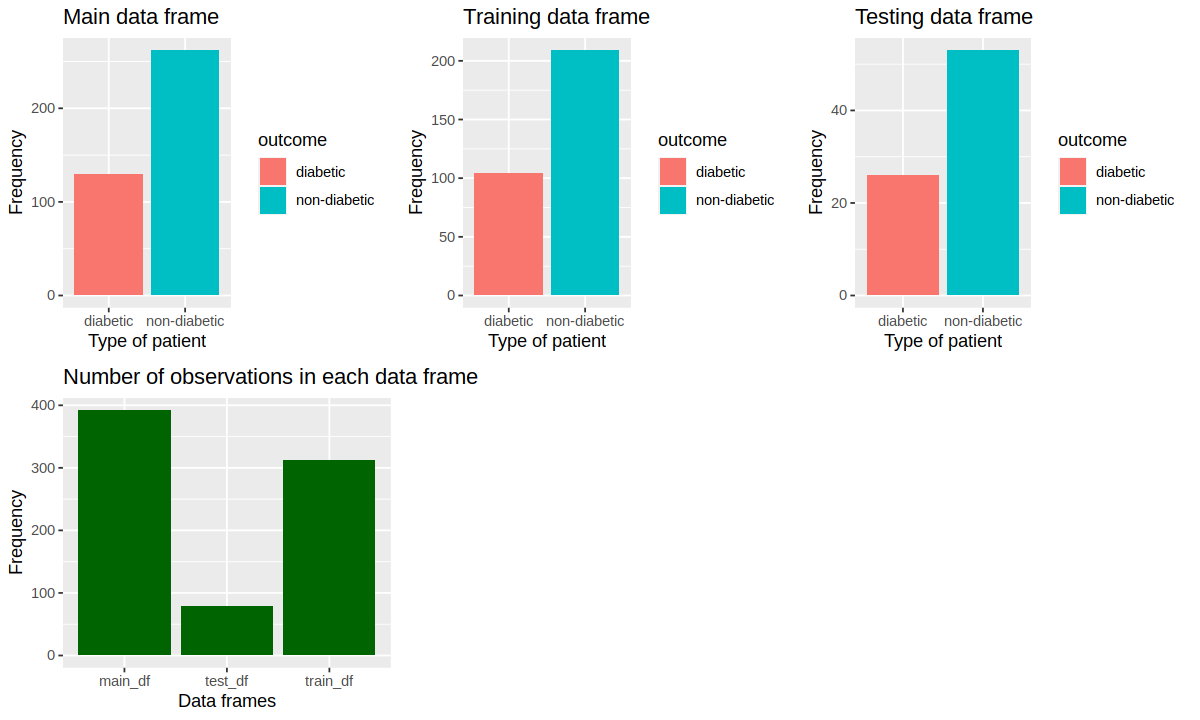

In [10]:
options(repr.plot.height = 6, repr.plot.width = 10)
bars1 <- ggplot(DIABETES_DATA, aes(outcome, fill = outcome)) +
        geom_bar() +
        labs(title = "Main data frame", y = "Frequency", x = "Type of patient")
bars2 <- ggplot(diabetes_train, aes(outcome, fill = outcome)) +
        geom_bar() +
        labs(title = "Training data frame", y = "Frequency", x = "Type of patient")
bars3 <- ggplot(diabetes_test, aes(outcome, fill = outcome)) +
        geom_bar() +
        labs(title = "Testing data frame", y = "Frequency", x = "Type of patient")
bar4_tibble <- tibble(df = c("main_df", "train_df", "test_df"), count = c(nrow(DIABETES_DATA), nrow(diabetes_train), nrow(diabetes_test)))
bar4 <- ggplot(bar4_tibble, aes(x = df, y = count)) +
        geom_bar(stat = "identity", fill = "darkgreen") +
        labs(title = "Number of observations in each data frame", y = "Frequency", x = "Data frames")
bars <- plot_grid(bars1, bars2, bars3, bar4, ncol=3)
bars

**(Figure 2.1, bar plots to show how different the data are from each other)**

This is to show that our data is maintaining those proportions and that the test data frame has around 70 observations and the training data frame has around 330.

In [11]:
diabetes_recipe<-recipe(outcome ~ glucose+bmi+blood_pressure+insulin, data = diabetes_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
diabetes_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

This is our recipe using 4 scaled and centered predictors. We did not use `step_upsample` since we believe our K value will be small enough that there will be no overbidding and therefore we will not the predicting the majority.

In [12]:
#V-folds(15 times)
diabetes_vfold <- vfold_cv(diabetes_train, v =15, strata = outcome)
#K_vals(try neighbors from 1 to 30)
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))
#knn_spec_tune to decide which K value we should use
knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

We have used 15 folds and tried neighbors from 1 to 30. 

In [7]:
knn_results <- workflow() |>
                 add_recipe(diabetes_recipe) |>
                 add_model(knn_spec_tune) |>
                 tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                 collect_metrics()
accuracies <- knn_results |>
  filter(.metric == "accuracy")
head(accuracies)

ERROR: Error in collect_metrics(tune_grid(add_model(add_recipe(workflow(), diabetes_recipe), : could not find function "collect_metrics"


**(Table 2.1, table showing the accuracy estimates of each K-NN value)**

This is now a simple workflow, adding the recipe, adding the model, and finding the best K value according to the training data. Then we get the metrics to plot and find a suitable K to use.

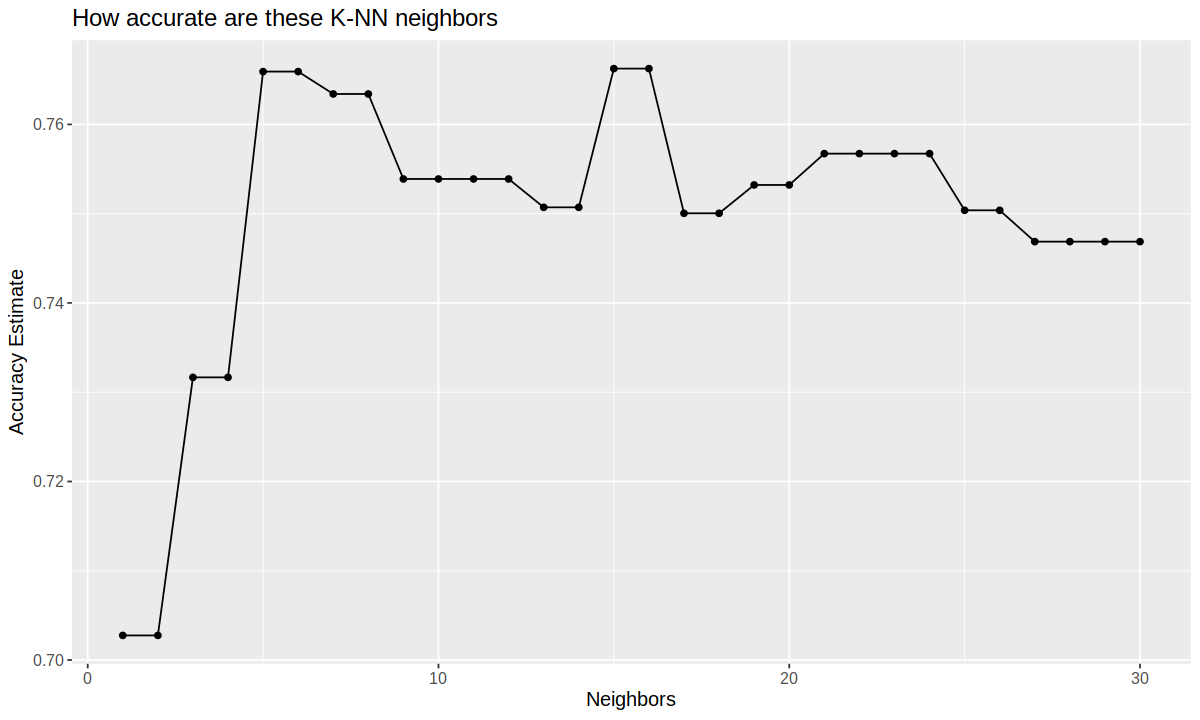

In [14]:
#select K values
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "How accurate are these K-NN neighbors") + 
  theme(text = element_text(size = 12))
accuracy_vs_k

**(Figure 2.2, line plot to visual the data from Table 2.1)**

Here, we have decided to try 6 neighbors since 15 is associated with a low accuracy score with the test data frame since that is a very high K compared to the number of observations in that data frame. 6 neighbors also has a very high accuracy estimate.

In [15]:
#Knn_ spec with the found K value(stil deciding)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
            set_engine("kknn") |>
            set_mode("classification")
#fit the recipe and knn_spec
knn_fit<-workflow() |>
             add_recipe(diabetes_recipe) |>
             add_model(knn_spec) |>
             fit(data = diabetes_train)
#predict
diabetes_test_predictions <- predict(knn_fit, diabetes_test) |>
                          bind_cols(diabetes_test)
head(diabetes_test_predictions)
#accuracy
diabetes_prediction_accuracy <- diabetes_test_predictions |>
                        metrics(truth = outcome, estimate = .pred_class)|>
                        filter(.metric == "accuracy")
pull(diabetes_prediction_accuracy, .estimate)

.pred_class,glucose,insulin,bmi,blood_pressure,outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
non-diabetic,89,94,28.1,66,non-diabetic
non-diabetic,137,168,43.1,40,diabetic
diabetic,197,543,30.5,70,diabetic
non-diabetic,97,140,23.2,66,non-diabetic
diabetic,158,245,31.6,76,diabetic
diabetic,176,300,33.7,90,diabetic


[1] 0.7721519

**(Table 2.2, table showing how our algorithm has predicted the test data frame, with the accuracy pulled out of the tibble)**

After, using 6 neighbors and trying to predict the test data frame, the prediction shows a promising accuracy of 77.2%.

## Discussion
Initially, we expected that new patient observations with a high BMI, high glucose concentrations, high blood pressure and low insulin levels, with respect to the dataset’s nearest neighbors in these regions, will also be classified as diabetic while patients with a lower BMI, lower glucose concentrations, lower blood pressure and higher insulin levels will be classified as non-diabetic since this corresponds with low levels of obesity and healthy diets.

However, our data showed weaker correlations between the predictor variables of insulin, blood pressure, and BMI than expected with a high correlation between glucose and the outcome. 

The most unexpected result was that higher insulin was an indication of a diabetic patient which can be seen by analyzing the prediction tibble and seeing how the data predicts higher insulin as diabetic. From this, we can assume that there were errors with the original data which could have been caused by insulin measurements being taken at inconsistent times between individuals; taking an insulin measure right after a meal would detect higher levels of insulin as it would be secreted to aid with digestion. Conversely, if some of the insulin measurements were taken after fasting, the insulin levels would be very low. This potential systematic error in data collection is hypothesized to have skewed the results given that low insulin is a standard indicator of a diabetic diagnosis (Mayo Clinic Staff, 2022).

Since glucose is such a strong diabetes determinant, the timing of the measurement taken would not hinder the data as extremely as the other variables which are more supplementary in the diagnosis of diabetes. The weak correlation with the BMI and blood pressure observations were not as surprising since there are a number of factors that lead to higher blood pressure which were not accounted for including smoking habits or daily stressors. This is also true of BMI which has been clinically classified as an imperfect measure of obesity as the calculation alone cannot differentiate between muscle and adipose tissue; this leads to an obesity classification for muscular athletes due to their muscle mass giving them an increased overall weight. 

In summary, a K-nearest neighbors algorithm was created. Through using multiple folds and multiple neighbors, 2 optimal values for K neighbors were determined: 6 or 15. Ultimately, K = 7 was used due to the population’s distribution of diabetic and non-diabetic patients in the data frame. 6 neighbors was optimal as 15 started overbidding and constantly classifying as a non-diabetic patient since that class was more populated within the data. 

These findings could impact a patient’s lifestyle in many ways, such as influencing them to lean towards a healthier lifestyle with reduced sugar intake or starting treatments if accurately classified as diabetic. If every nearest neighbor was diabetic, these findings could influence the doctor to prescribe diabetes treatments and interventions such as insulin and a physical activity regime, respectively. If the neighbors are presented to be half diabetic and half non-diabetic, this could suggest a pre-diabetic diagnosis where further medical testing would benefit the patient’s health in the case that they are nearing diabetes and have the chance to prevent the onset in its early developmental stages. 

This analysis could also lead to researchers performing this study using male patients. Since this dataset has all female patients, future research could determine whether male diabetes falls within similar glucose level thresholds as well as BMI due to a difference in body composition between the 2 sexes. Female body composition naturally includes a higher level of fat to account for maternal needs which can hypothesize that higher BMI would indicate more male diabetes diagnoses compared to females. 

Another question would be to look across different geographical locations to see if lifestyle and cultural influences affected the measures. This dataset focused on the Pima India heritage, but it would be interesting to see similar classification research conducted on individuals across every continent as there are a variety of cultural norms regarding differences in not only common diets, but physical activity and stress depending on the types of jobs available and the country’s safety status. Overall, the varying lifestyles would change this data analysis and could be used by industries such as the World Health Organization (WHO) in order to encourage diabetes treatments custom to each specific condition and set of observations. 


# References 

Centers for Disease Control and Prevention [CDC]. (2023). What is Diabetes? *cdc.gov*. https://www.cdc.gov/diabetes/basics/diabetes.htmlOur

Diabetes Canada. Body Mass Index (BMI) Calculator. (December 2023). *diabetes.ca*. https://www.diabetes.ca/resources/tools---resources/body-mass-index-(bmi)-calculator

Hopkins Medicine. Diabetes and High Blood Pressure. (2023) *The Johns Hopkins University*. https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-high-blood-pressure

Klein S, Gastaldelli A, Yki-Järvinen H, Scherer PE (January 2022). Why does obesity cause diabetes? *Cell Metabolism*. 34(1):11-20. https://www.cell.com/cell-metabolism/fulltext/S1550-4131(21)00631-8?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS1550413121006318%3Fshowall%3Dtrue

Mayo Clinic Staff. Hyperglycemia and diabetes. (August 2022). *mayoclinic.org*. https://www.mayoclinic.org/diseases-conditions/hyperglycemia/symptoms-causes/syc-20373631

UCI Machine Learning (2016). Pima Indians Diabetes Database. *kaggle*. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv